<a href="https://colab.research.google.com/github/Awiity/pracproj_filesorter/blob/main/pracproj_webscraber_fakepythonjobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Very basic implementation of Web Scraper in python using BeautifulSoup4 and requests libraries. For Educational purposes.**

Taking HTML file via html-request using requests library and throwing it into the parser.

SRC: https://realpython.com/beautiful-soup-web-scraper-python/

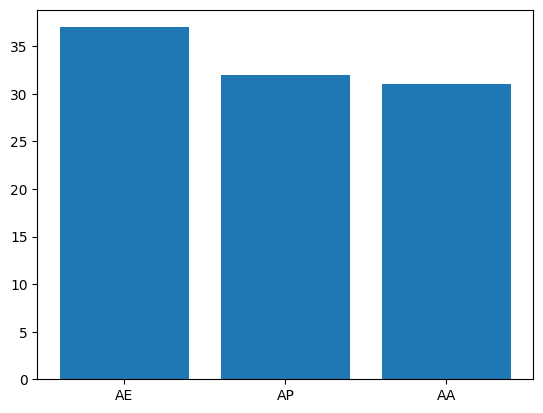

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt



URL = "https://realpython.github.io/fake-jobs/"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")
results = soup.find(id="ResultsContainer")
job_elements = results.find_all("div", class_="card-content")
job_locations = []
job_companies = []
job_titles = []
job_state = []

for job in job_elements:
    job_location = job.find("p", class_="location").text.strip()
    job_title = job.find("h2", class_="title is-5").text.strip()
    job_company = job.find("h3", class_="subtitle is-6 company").text.strip()
    job_locations.append(job_location)
    job_companies.append(job_company)
    job_titles.append(job_title)
    job_state.append(job_location[-2:])

dictr = {
    "job_location": job_locations,
    "job_companies": job_companies,
    "job_titles": job_titles,
    "job_state": job_state
}
df = pd.DataFrame(dictr)
df_vc = df.value_counts("job_state")
plt.bar(list(df_vc.index), df_vc)
plt.show()



# Filtering only Python related titles

In [7]:
python_jobs = results.find_all("h2", string=lambda text: "python" in text.lower())

python_job_elements = [h2child.parent.parent.parent for h2child in python_jobs]

print(python_job_elements[0], "\n")

<div class="card-content">
<div class="media">
<div class="media-left">
<figure class="image is-48x48">
<img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
</figure>
</div>
<div class="media-content">
<h2 class="title is-5">Senior Python Developer</h2>
<h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>
</div>
</div>
<div class="content">
<p class="location">
        Stewartbury, AA
      </p>
<p class="is-small has-text-grey">
<time datetime="2021-04-08">2021-04-08</time>
</p>
</div>
<footer class="card-footer">
<a class="card-footer-item" href="https://www.realpython.com" target="_blank">Learn</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html" target="_blank">Apply</a>
</footer>
</div> 



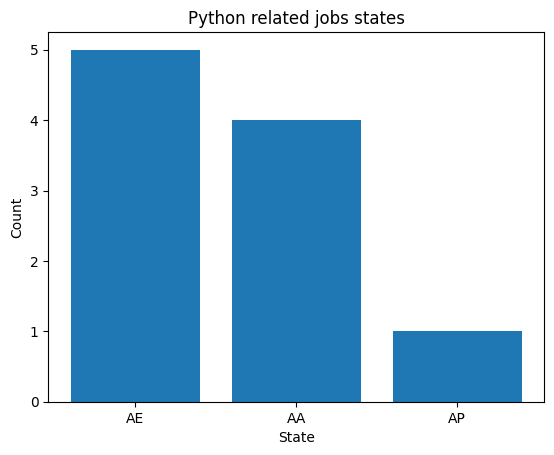

In [12]:
job_locations = []
job_states = []
job_titles = []
for element in python_job_elements:
  job_locations.append(element.find("p", class_="location").text.strip()) # both city and state
  job_states.append((element.find("p", class_="location").text.strip())[-2:]) # [-2:] returns state of location
  job_titles.append(element.find("h2", class_="title is-5").text.strip())
#print(job_locations, "\n", job_states, "\n", job_titles)
dictr = {
    "job_location": job_locations,
    "job_state": job_states,
    "job_title": job_titles
}
df = pd.DataFrame(dictr)
df_vc = df.value_counts("job_state")
plt.bar(list(df_vc.index), df_vc)
plt.title("Python related jobs states")
plt.xlabel("State")
plt.ylabel("Count")
plt.show()